#**Stabilization of Cart Pole system**: 
> Consider cart pole system:
>
>
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1O1iM6MByfMyrO0txAMFb_miOqPNzFAvm" align="center" hspace="350px" vspace="0px"></p>
>
>
> Do the following:
>*   1) Design the linear feedback controller using linearization of the cart-pole dynamics.
>*   2) Simulate the response of your controller on the linearized and nonlinear system, compare the results.
>*   3) Taking into account that $y = Cx$ is measured, design observer and linear control that uses observer state. 
>*   4) Simulate the nonlinear system with the observer and controller, show the difference between the actual motion of the nonlinear system and its estimate produced by teh observer.
>
> [Here is the great illustration of the hardware implemintation of the cart-pole](https://www.youtube.com/shorts/NJxBJ2LJY7w) 


## **System Dynamics**:

Recall the dynamics of cart-pole system:
\begin{equation}
\begin{cases} 
\left(M+m\right){\ddot {p}}-m L \ddot{\theta} \cos \theta +m L \dot{\theta }^{2}\sin \theta = u \\
L \ddot{\theta}- g\sin \theta =\ddot{p} \cos \theta  \\
\end{cases}
\end{equation}

where $\theta$ is angle of the pendulum measured from the upper equilibrium and $p$ is position of cart


Choosing the state to be $\mathbf{x} = [\theta, \dot{\theta}, p, \dot{p}]^T$One may rewrite this dynamics in the state-space form as:
\begin{equation}
\mathbf{\dot{x}} = 
\begin{bmatrix}
\dot{\theta} \\ 
\ddot{\theta} \\ 
\dot{p} \\ 
\ddot{p}
\end{bmatrix} 
= 
\begin{bmatrix}
\dot{\theta} \\ 
\frac{(M+m)g \sin \theta - mL \dot{\theta}^2 \sin\theta \cos\theta}{(M + m\sin^2 \theta)L} \\ 
\dot{x} \\ 
\frac{mg\sin\theta \cos\theta - mL\dot{\theta}^2 \sin \theta}{M + m\sin^2 \theta} \\ 
\end{bmatrix} 
+
\begin{bmatrix}
0 \\ 
\frac{\cos\theta}{(M + m\sin^2 \theta)L} \\ 
0 \\ 
\frac{1}{M + m\sin^2 \theta} \\ 
\end{bmatrix} u
\end{equation}


### **System parameters**:
Let us choose the following parameters:

In [3]:
import numpy.linalg

m = 0.5 # mass of pendulum bob
M = 2 # mass of cart
pendulum_length = 0.3 # length of pendulum
g = 9.81 # gravitational acceleration


#### **Nonlinear dynamics**:

First of all let us define the nonlinear system in form $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, \mathbf{u})$ :

In [4]:
import numpy as np
from math import cos, sin

import matplotlib.pyplot as plt

# sin, cos = np.sin, np.cos
# Nonlinear cart-pole dynamics
def f(x, u):
    theta, dtheta, p, dp = x
    u = u[0]

    denominator = M + m*(sin(theta)**2)
    ddtheta = ((M + m) * g * sin(theta) - m * pendulum_length * dtheta ** 2 * sin(theta) * cos(theta) + cos(theta) * u) / (denominator * pendulum_length)
    ddp = (m * g * sin(theta) * cos(theta) - m * pendulum_length * dtheta ** 2 * sin(theta) + u) / denominator

    dx = np.array([dtheta, ddtheta, dp, ddp])
    return dx

x0 = np.array([1, # Initial pendulum angle
      0, # Initial pendulum angular speed
      1, # Initial cart position
      0]) # Initial cart speed
u0 = np.array([0])
print(f(x0, u0))

[ 0.         29.22225161  0.          0.947331  ]


### **Linearized Dynamics**:

Liniarization around the upper equilibrium $\mathbf{x} = [0,0,0,0]$ yields:

\begin{equation}
\mathbf{\dot{x}} = 
\begin{bmatrix}
\dot{\theta} \\ 
\ddot{\theta} \\ 
\dot{p} \\ 
\ddot{p}
\end{bmatrix} 
=
\begin{bmatrix}
0 & 1 & 0 & 0\\
\frac{(M+m)}{M}\frac{g}{L} & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\frac{m}{M}g & 0 & 0 & 0 
\end{bmatrix} 
\begin{bmatrix}
\theta \\ 
\dot{\theta} \\ 
p \\ 
\dot{p}
\end{bmatrix} 
+
\begin{bmatrix}
0 \\
\frac{1}{ML} \\
0 \\
\frac{1}{M}
\end{bmatrix}
u
\end{equation}

In [5]:
# System matrix
A = np.array([[0, 1, 0, 0],
             [(M + m) * g / (M * pendulum_length), 0, 0, 0],
             [0,0,0,1],
             [m*g/M, 0, 0, 0]])
# Input matrix
B = np.array([[0],
             [1 / (M * pendulum_length)],
             [0],
             [1/M]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])

### **Controller Design**:

Let us design the controller for linearized plant by placing poles (eigen values) on the left-hand side of complex plane:


Insert your control design / observer design code here.

Check eigenvalues of the closed-loop system for 1) closed-loop for the case when full state information is available and no observer is used, 2) when only measurement y = C*x is availible and an observer is used.

In [6]:
from scipy.signal import place_poles, ss2tf

#The system is stable when the real part of its eigenvalues are negative, so create a set of 4 negative real eigenvalues

# eig = np.random.uniform(-10, -1, size=(4,))
eig =  [-5, -4, -2, -3]

#Control law for the system without observer
place_poles_state = place_poles(A, B, eig)
K = place_poles_state.gain_matrix
print("Matrix K:", K, "\n")

#Control law for the system with only y=Cx measurement
print ("u = -", K, "x\n")
place_poles_observer = place_poles(A.T, C.T, eig)
L = place_poles_observer.gain_matrix.T
print("Matrix L:", L,"\n")
print (f"u = -{L}*y\n")

Matrix K: [[69.32683486 11.22568807 -7.33944954 -9.41896024]] 

u = - [[69.32683486 11.22568807 -7.33944954 -9.41896024]] x

Matrix L: [[3.55207503e+00 1.49728824e+00 1.62795684e-03]
 [4.13722873e+01 3.44793783e+00 9.13165469e-04]
 [7.26089884e-03 4.63474598e-03 6.99998714e+00]
 [2.46973508e+00 1.07914466e-02 9.99997733e+00]] 

u = -[[3.55207503e+00 1.49728824e+00 1.62795684e-03]
 [4.13722873e+01 3.44793783e+00 9.13165469e-04]
 [7.26089884e-03 4.63474598e-03 6.99998714e+00]
 [2.46973508e+00 1.07914466e-02 9.99997733e+00]]*y



In [7]:
from numpy import linalg

eig_received_K = linalg.eigvals(A - B @ K)
print("Received eigenvalues by closed-loop for the case when full state information is available and no observer is used: " , eig_received_K)

eig_received_L = linalg.eigvals(A - L@C)
print("Received eigenvalues by closed-loop for the case when full state information is available, when only measurement y = C*x is available and an observer is used.: " , eig_received_L)

Received eigenvalues by closed-loop for the case when full state information is available and no observer is used:  [-5. -4. -3. -2.]
Received eigenvalues by closed-loop for the case when full state information is available, when only measurement y = C*x is available and an observer is used.:  [-4. -3. -5. -2.]


##  **Simulation**:
We proceed with the simulation of designed controller, firstly we will define the simulation parameters: 

In [8]:
# Time settings
t0 = 0 # Initial time
tf = 10 # Final time
N = 1000 # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

# Define initial point 
theta_0 = 0.4
p_0 = 0.1

# Set initial state 
x0 = np.array([theta_0, # Initial pendulum angle
      0, # Initial pendulum angular speed
      p_0, # Initial cart position
      0]) # Initial cart speed


#### **Linearized dynamics**:
Now let us simulate the response of linear controller on the **linearized** system:

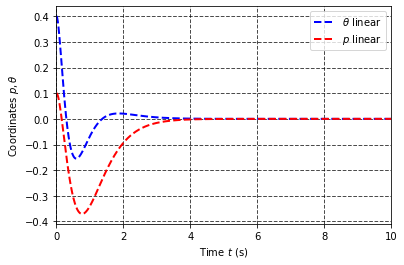

In [9]:
# import integrator routine
from scipy.integrate import odeint

# Define the linear ODE to solve
def linear_ode(x, t, A, B, K):
    # Linear controller
    u = - np.dot(K,x)
    # Linearized dynamics
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

# integrate system "sys_ode" from initial state $x0$
x_l = odeint(linear_ode, x0, t, args=(A, B, K,))
theta_l, dtheta_l, p_l, dp_l = x_l[:,0], x_l[:,1], x_l[:,2], x_l[:,3]
# Plot the results
plt.plot(t, theta_l, 'b--', linewidth=2.0, label = r'$\theta$ linear')
plt.plot(t, p_l, 'r--', linewidth=2.0, label = r'$p$ linear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

Now we will simulate similarly to linear case while using the same gains $\mathbf{K}$:

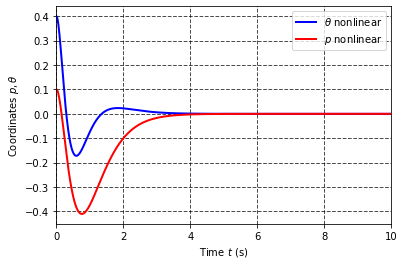

In [10]:
def nonlinear_ode(x, t, K):

    # Linear controller
    u = - np.dot(K,x)

    # Nonlinear dynamics
    dx = f(x, u)

    return dx

# integrate system "sys_ode" from initial state $x0$
x_nl = odeint(nonlinear_ode, x0, t, args=(K,))
theta_nl, dtheta_nl, p_nl, dp_nl = x_nl[:,0], x_nl[:,1], x_nl[:,2], x_nl[:,3]
# Plot the resulst
plt.plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
plt.plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

### Simulation with observer

Insert your code simulating the behaviour of the nonlinear system with an observer. Plot the results, compare state estimation and actual state of the system.

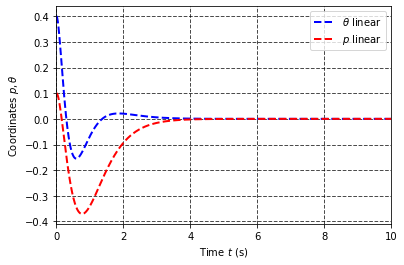

In [11]:
from scipy.integrate import odeint


def observer_controller(state, t, system_param, observer_params):
    x, x_hat = np.split(state, 2)
    A = system_param['A']
    B = system_param['B']
    K = system_param['K']
    C = observer_params['C']
    L = observer_params['L']
    A_obs = observer_params['A']


    u = -np.dot(K, x_hat)
    dx = np.dot(A, x) + np.dot(B, u)
    y = np.dot(C, x)
    #
    y_hat = np.dot(C, x_hat)
    e = y - y_hat
    dx_hat = np.dot(A_obs, x_hat) + np.dot(B, u) + np.dot(L, e)
    # print(dx_hat)
    #
    dstate = np.hstack((dx, dx_hat))
    # dstate = dx, dx_hat
    return dstate


A_o = np.array(A)

system_params = {'A': A, 'B': B, 'K': K}
observer_params = {'A': A_o, 'C': C, 'L': L}

x0_hat = x0 + [0.01, 0.01, 0.1, -0.01]
state_0 = np.hstack((x0, x0_hat))

# integrate system "sys_ode" from initial state $x0$
state_sol = odeint(observer_controller, state_0, t, args=(system_params, observer_params))

x_real, x_hat =np.split(state_sol, 2, axis = 1)
theta, dtheta, x, dx = np.split(x_real, 4, axis=1)
theta_hat, dtheta_hat, x_hat, dx_hat = np.split(x_hat, 4, axis=1)

# Plot the results
plt.plot(t, theta_l, 'b--', linewidth=2.0, label=r'$\theta$ linear')
plt.plot(t, p_l, 'r--', linewidth=2.0, label=r'$p$ linear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()


### **Comparison**:
One may compare the linear and nonlinear responses by plotting them together:

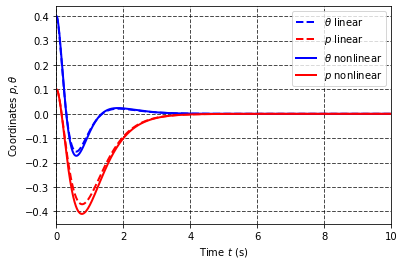

In [12]:
# theta_l, p_l - values of theta and p for the linear system
# theta_nl, p_nl - values of theta and p for the nonlinear system

plt.plot(t, theta_l, 'b--', linewidth=2.0, label = r'$\theta$ linear')
plt.plot(t, p_l, 'r--', linewidth=2.0, label = r'$p$ linear')
plt.plot(t, theta_nl, 'b', linewidth=2.0, label = r'$\theta$ nonlinear')
plt.plot(t, p_nl, 'r', linewidth=2.0, label = r'$p$ nonlinear')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.legend()
plt.xlim([t0, tf])
plt.ylabel(r'Coordinates $p,\theta$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

# Animation

In [13]:
p = p_nl
theta = theta_nl
time = t

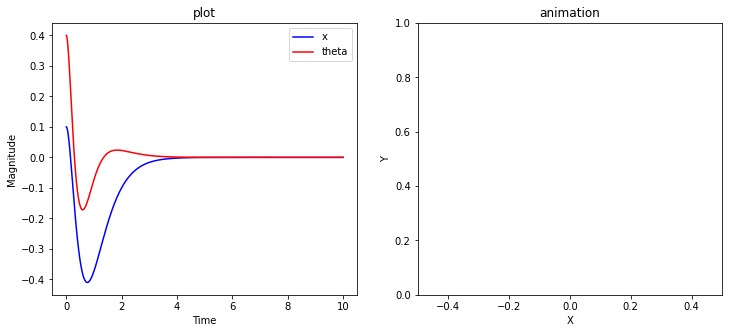

In [14]:
%matplotlib inline

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
# ax1.set_xlim(( 0, 2))            
# ax1.set_ylim((-0.3, 0.3))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-0.5,0.5))
ax2.set_ylim((0,1))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('animation')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('plot')
line_x,     = ax1.plot(time, p, 'b')     # ax.plot returns a list of 2D line objects
line_theta, = ax1.plot(time, theta, 'r')
point_x,     = ax1.plot([], [], 'g.', ms=20)
point_theta, = ax1.plot([], [], 'g.', ms=20)

draw_cart,  = ax2.plot([], [], 'b', lw=2)
draw_shaft, = ax2.plot([], [], 'r', lw=2)

ax1.legend(['x','theta']);

In [15]:

shaft_l = 0.3
cart_l = 0.1
cart_x = np.array([-1, -1, 1, 1, -1])*cart_l
cart_y = np.array([ 0,  1, 1, 0,  0])*cart_l


# animation function. This is called sequentially
def drawframe(n):

    shaft_x = np.array([ p[n],  p[n] + shaft_l*sin(theta[n] )])
    shaft_y = np.array([ cart_l/2,  cart_l/2 + shaft_l*cos(theta[n] )])

    line_x.set_data(time, p)
    line_theta.set_data(time, theta)

    point_x.set_data(time[n], p[n])
    point_theta.set_data(time[n], theta[n])

    draw_cart.set_data(cart_x+p[n], cart_y)
    draw_shaft.set_data(shaft_x, shaft_y)

    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (draw_cart,draw_shaft)

In [16]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=200, interval=20, blit=True)

## Here we try to make a video of the cart-pole as it moves

In [17]:
from IPython.display import HTML
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available